In [1]:
# Dependences and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from scipy import stats

In [2]:
# Load the CSV file and display sample data
shopping_df = Path("shopping_trends_updated.csv")
shopping_df = pd.read_csv(shopping_df)
shopping_df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
#Add age groups to the DataFrame
shopping_df["Age Groups"] = pd.cut(
    x=shopping_df["Age"],
    bins =[1, 26, 42, 59, np.inf],
    labels=["Gen Z", "Millenials", "Gen X", "Baby Boomer"], 
)

shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gen X
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Gen Z
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Gen X
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Gen Z
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Millenials
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Gen X
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Gen X
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Gen X


In [105]:
# Reorganize the columns within the DataFrame
organized_df = shopping_df[["Customer ID", "Age", "Age Groups", "Gender", 
                            "Item Purchased", "Category", "Purchase Amount (USD)", 
                            "Location", "Size", "Color", "Season", "Review Rating", 
                            "Subscription Status", "Shipping Type", "Discount Applied", 
                            "Promo Code Used", "Previous Purchases", "Payment Method", 
                            "Frequency of Purchases"]]
organized_df.head()

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [107]:
# Calculate the percentage of each group

# Percentage of Millennials
millenials_count = organized_df.loc[organized_df["Age Groups"] == "Millenials"].shape[0]
total_count = len(organized_df["Age Groups"])
millenials_percent = (millenials_count/total_count) * 100

# Percentage of GenZ
GenZ_count = organized_df.loc[organized_df["Age Groups"] == "Gen Z"].shape[0]
total_count = len(organized_df["Age Groups"])
GenZ_percent = (GenZ_count/total_count) * 100

# Percentage of GenX
GenX_count = organized_df.loc[organized_df["Age Groups"] == "Gen X"].shape[0]
total_count = len(organized_df["Age Groups"])
GenX_percent = (GenX_count/total_count) * 100

# Percentage of Baby Boomers
Baby_count = organized_df.loc[organized_df["Age Groups"] == "Baby Boomer"].shape[0]
total_count = len(organized_df["Age Groups"])
Baby_percent = (Baby_count/total_count) * 100

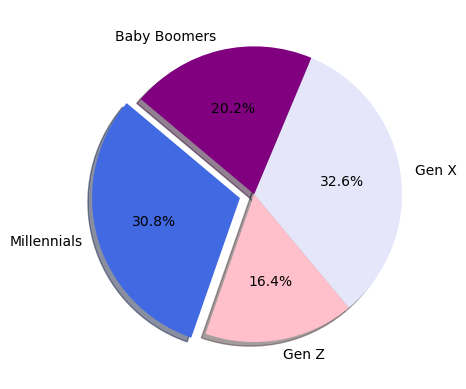

In [109]:
# Establish data for the pie chart
labels = ["Millennials", "Gen Z", "Gen X", "Baby Boomers"]
sizes = [millenials_percent, GenZ_percent, GenX_percent, Baby_percent]
colors = ['royalblue','pink','lavender','purple']
explode = (0.1, 0, 0, 0)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [5]:
# organized_df.to_csv("output_data/shopping_trends.csv", index_label="Customer ID")

In [6]:
gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())
gen_group_count

/var/folders/46/ts8y8d316y90ddxp6yyx4cb80000gn/T/ipykernel_57221/1805281516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())


,Customer ID
Age Groups,
Gen Z,640
Millenials,1200
Gen X,1272
Baby Boomer,788


In [7]:
organized_df["Age Groups"].value_counts()

Age Groups
Gen X          1272
Millenials     1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

In [8]:
organized_df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [9]:
organized_df.groupby(["Age Groups"])["Gender"].value_counts()

/var/folders/46/ts8y8d316y90ddxp6yyx4cb80000gn/T/ipykernel_57221/1705233892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  organized_df.groupby(["Age Groups"])["Gender"].value_counts()


Age Groups   Gender
Gen Z        Male      442
             Female    198
Millenials   Male      822
             Female    378
Gen X        Male      846
             Female    426
Baby Boomer  Male      542
             Female    246
Name: count, dtype: int64

In [10]:
GenZ_male = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Male")].sample(n=198)
GenZ_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1860,1861,18,Gen Z,Male,T-shirt,Clothing,64,Kansas,M,Silver,Summer,4.8,No,Next Day Air,No,No,4,Credit Card,Monthly
1514,1515,26,Gen Z,Male,Shoes,Footwear,90,Utah,L,Brown,Winter,3.9,No,2-Day Shipping,Yes,Yes,1,Venmo,Weekly
643,644,18,Gen Z,Male,Sweater,Clothing,57,Oregon,XL,Green,Winter,3.2,Yes,Next Day Air,Yes,Yes,10,Bank Transfer,Every 3 Months
403,404,19,Gen Z,Male,Sneakers,Footwear,45,Nevada,M,Orange,Winter,4.5,Yes,Next Day Air,Yes,Yes,12,Bank Transfer,Annually
1073,1074,22,Gen Z,Male,Scarf,Accessories,96,California,XL,Purple,Spring,4.0,No,Store Pickup,Yes,Yes,33,Credit Card,Monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1490,24,Gen Z,Male,Jewelry,Accessories,26,Missouri,XL,Magenta,Summer,4.1,No,Next Day Air,Yes,Yes,42,Venmo,Quarterly
1017,1018,21,Gen Z,Male,Jacket,Outerwear,53,Oklahoma,L,Orange,Fall,2.5,Yes,Express,Yes,Yes,14,Credit Card,Annually
1656,1657,21,Gen Z,Male,Blouse,Clothing,42,Indiana,L,Brown,Spring,2.6,No,2-Day Shipping,Yes,Yes,41,PayPal,Every 3 Months
2168,2169,23,Gen Z,Male,Handbag,Accessories,74,Connecticut,M,Beige,Spring,4.1,No,Next Day Air,No,No,32,Cash,Quarterly


In [11]:
Mill_male = organized_df.loc[(organized_df["Age Groups"]=="Millenials")&(organized_df["Gender"]=="Male")].sample(n=198)
Mill_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
760,761,33,Millenials,Male,Gloves,Accessories,50,Minnesota,XL,Violet,Fall,3.4,Yes,Free Shipping,Yes,Yes,6,Cash,Annually
2290,2291,37,Millenials,Male,Boots,Footwear,48,Kansas,L,Magenta,Winter,3.3,No,Standard,No,No,23,PayPal,Quarterly
1927,1928,40,Millenials,Male,Pants,Clothing,29,Florida,M,Pink,Summer,2.9,No,Standard,No,No,8,Cash,Every 3 Months
656,657,42,Millenials,Male,Jeans,Clothing,23,Pennsylvania,M,Beige,Summer,3.9,Yes,Standard,Yes,Yes,6,PayPal,Quarterly
1748,1749,34,Millenials,Male,Skirt,Clothing,93,Montana,L,Teal,Winter,3.9,No,2-Day Shipping,No,No,41,Bank Transfer,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,950,33,Millenials,Male,Jeans,Clothing,36,Montana,M,Olive,Summer,3.4,Yes,Standard,Yes,Yes,49,Venmo,Monthly
964,965,42,Millenials,Male,Sandals,Footwear,51,Arizona,M,Beige,Spring,2.6,Yes,Next Day Air,Yes,Yes,12,Venmo,Bi-Weekly
263,264,27,Millenials,Male,Shorts,Clothing,46,Iowa,M,Purple,Summer,4.3,Yes,Store Pickup,Yes,Yes,29,Venmo,Monthly
226,227,29,Millenials,Male,Shoes,Footwear,74,Texas,L,Violet,Spring,3.3,Yes,Free Shipping,Yes,Yes,5,PayPal,Monthly


In [12]:
GenX_male = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Male")].sample(n=198)
GenX_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1940,1941,50,Gen X,Male,Hat,Accessories,89,Alaska,L,Gray,Fall,3.9,No,2-Day Shipping,No,No,48,PayPal,Fortnightly
1695,1696,54,Gen X,Male,Hat,Accessories,95,Nebraska,S,Yellow,Fall,4.7,No,2-Day Shipping,No,No,1,PayPal,Fortnightly
2198,2199,57,Gen X,Male,Scarf,Accessories,80,New York,L,Turquoise,Summer,3.5,No,Free Shipping,No,No,35,Venmo,Monthly
2334,2335,49,Gen X,Male,Boots,Footwear,79,Kansas,L,Green,Summer,4.2,No,Standard,No,No,7,Credit Card,Monthly
406,407,52,Gen X,Male,Gloves,Accessories,55,Maryland,M,Peach,Spring,4.6,Yes,Express,Yes,Yes,13,Cash,Monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,1343,57,Gen X,Male,Sunglasses,Accessories,43,Arizona,XL,Yellow,Summer,3.4,No,2-Day Shipping,Yes,Yes,11,Bank Transfer,Monthly
1397,1398,55,Gen X,Male,Sunglasses,Accessories,67,Massachusetts,S,Magenta,Summer,4.7,No,Store Pickup,Yes,Yes,33,PayPal,Annually
2460,2461,58,Gen X,Male,Jeans,Clothing,36,Maine,S,Lavender,Winter,4.0,No,Store Pickup,No,No,28,Credit Card,Annually
2094,2095,53,Gen X,Male,Socks,Clothing,25,South Carolina,M,Indigo,Spring,3.4,No,Standard,No,No,19,Venmo,Annually


In [13]:
Baby_male = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Male")].sample(n=198)
Baby_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
374,375,69,Baby Boomer,Male,Jewelry,Accessories,78,Ohio,S,Purple,Spring,5.0,Yes,Store Pickup,Yes,Yes,39,Bank Transfer,Monthly
628,629,69,Baby Boomer,Male,Sweater,Clothing,85,Massachusetts,M,White,Fall,3.7,Yes,2-Day Shipping,Yes,Yes,29,Credit Card,Monthly
1134,1135,62,Baby Boomer,Male,T-shirt,Clothing,81,Wisconsin,M,Brown,Summer,4.6,No,Express,Yes,Yes,2,Venmo,Every 3 Months
1936,1937,70,Baby Boomer,Male,Jewelry,Accessories,60,Minnesota,S,Teal,Summer,4.3,No,2-Day Shipping,No,No,44,PayPal,Every 3 Months
779,780,60,Baby Boomer,Male,Dress,Clothing,94,Utah,M,Blue,Spring,4.6,Yes,Express,Yes,Yes,38,Cash,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,1876,63,Baby Boomer,Male,Boots,Footwear,71,Tennessee,M,Brown,Winter,3.9,No,Next Day Air,No,No,6,Credit Card,Quarterly
1164,1165,68,Baby Boomer,Male,Dress,Clothing,96,Montana,M,Green,Winter,4.2,No,Standard,Yes,Yes,47,PayPal,Quarterly
592,593,60,Baby Boomer,Male,Boots,Footwear,29,North Dakota,M,Brown,Fall,3.2,Yes,Free Shipping,Yes,Yes,42,Venmo,Every 3 Months
315,316,66,Baby Boomer,Male,Jewelry,Accessories,24,Wisconsin,XL,Orange,Spring,4.5,Yes,Express,Yes,Yes,24,Debit Card,Annually


In [14]:
GenZ_female = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Female")].sample(n=198)
GenZ_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3499,3500,22,Gen Z,Female,Socks,Clothing,29,New Jersey,L,Indigo,Fall,3.0,No,Next Day Air,No,No,13,PayPal,Every 3 Months
3514,3515,25,Gen Z,Female,Sneakers,Footwear,50,Georgia,XL,Gray,Winter,4.7,No,Express,No,No,32,Cash,Monthly
2973,2974,25,Gen Z,Female,Boots,Footwear,65,Indiana,M,Blue,Summer,2.7,No,Store Pickup,No,No,3,Bank Transfer,Fortnightly
3110,3111,19,Gen Z,Female,Handbag,Accessories,46,Texas,L,Lavender,Fall,4.6,No,Next Day Air,No,No,2,Bank Transfer,Bi-Weekly
3706,3707,26,Gen Z,Female,Sandals,Footwear,55,Kansas,M,Green,Spring,4.0,No,Store Pickup,No,No,17,Cash,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2714,19,Gen Z,Female,Coat,Outerwear,57,Mississippi,M,Magenta,Fall,3.8,No,2-Day Shipping,No,No,20,Debit Card,Annually
3094,3095,22,Gen Z,Female,Sandals,Footwear,59,Georgia,M,Gray,Summer,2.7,No,Store Pickup,No,No,9,Cash,Weekly
3374,3375,22,Gen Z,Female,Blouse,Clothing,47,Nevada,S,Lavender,Spring,3.7,No,2-Day Shipping,No,No,41,Debit Card,Annually
2662,2663,25,Gen Z,Female,Skirt,Clothing,98,Nebraska,M,Cyan,Summer,2.8,No,2-Day Shipping,No,No,44,PayPal,Fortnightly


In [15]:
Mill_female = organized_df.loc[(organized_df["Age Groups"]=="Millenials")&(organized_df["Gender"]=="Female")].sample(n=198)
Mill_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2854,2855,36,Millenials,Female,Sandals,Footwear,28,Delaware,M,Beige,Fall,2.7,No,Store Pickup,No,No,25,Venmo,Monthly
3623,3624,39,Millenials,Female,Jewelry,Accessories,89,Arkansas,M,Violet,Winter,2.7,No,2-Day Shipping,No,No,4,PayPal,Weekly
3267,3268,37,Millenials,Female,Hoodie,Clothing,45,Idaho,L,Pink,Winter,3.0,No,Store Pickup,No,No,42,Credit Card,Quarterly
3791,3792,40,Millenials,Female,Sunglasses,Accessories,51,Texas,M,Gray,Spring,3.7,No,Store Pickup,No,No,1,Venmo,Weekly
3574,3575,29,Millenials,Female,Socks,Clothing,70,New York,M,Cyan,Fall,4.9,No,Express,No,No,39,Bank Transfer,Quarterly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,3529,38,Millenials,Female,Scarf,Accessories,67,Maine,L,Gray,Summer,4.5,No,Free Shipping,No,No,33,PayPal,Annually
3349,3350,35,Millenials,Female,Jewelry,Accessories,79,Georgia,M,Red,Fall,2.8,No,Store Pickup,No,No,29,PayPal,Quarterly
2692,2693,40,Millenials,Female,Sneakers,Footwear,90,Washington,XL,Violet,Spring,4.2,No,Free Shipping,No,No,18,Debit Card,Every 3 Months
3134,3135,35,Millenials,Female,Boots,Footwear,66,Kentucky,L,Gray,Spring,4.4,No,Store Pickup,No,No,47,Bank Transfer,Weekly


In [16]:
GenX_female = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Female")].sample(n=198)
GenX_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2723,2724,54,Gen X,Female,Shoes,Footwear,49,Texas,XL,Brown,Summer,2.9,No,Store Pickup,No,No,3,PayPal,Every 3 Months
3351,3352,43,Gen X,Female,Shirt,Clothing,49,New Hampshire,L,Cyan,Spring,4.2,No,2-Day Shipping,No,No,18,Bank Transfer,Fortnightly
2985,2986,46,Gen X,Female,Belt,Accessories,36,Hawaii,S,Teal,Summer,3.0,No,Express,No,No,21,Cash,Bi-Weekly
3837,3838,45,Gen X,Female,Hoodie,Clothing,100,New Mexico,M,Green,Spring,4.8,No,Free Shipping,No,No,33,Bank Transfer,Fortnightly
2917,2918,58,Gen X,Female,Shirt,Clothing,45,Colorado,XL,White,Winter,2.9,No,Store Pickup,No,No,50,Venmo,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,2900,50,Gen X,Female,Boots,Footwear,64,Nebraska,M,Gold,Spring,4.2,No,2-Day Shipping,No,No,22,Bank Transfer,Fortnightly
3871,3872,55,Gen X,Female,T-shirt,Clothing,97,Minnesota,M,Black,Fall,4.1,No,2-Day Shipping,No,No,20,Bank Transfer,Every 3 Months
3225,3226,53,Gen X,Female,Blouse,Clothing,98,New Hampshire,M,Pink,Fall,3.0,No,Store Pickup,No,No,31,Credit Card,Weekly
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly


In [17]:
Baby_female = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Female")].sample(n=198)
Baby_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2879,2880,62,Baby Boomer,Female,Blouse,Clothing,57,North Dakota,XL,Turquoise,Winter,4.9,No,Free Shipping,No,No,31,Venmo,Annually
3191,3192,62,Baby Boomer,Female,Hoodie,Clothing,68,Mississippi,XL,Maroon,Winter,4.7,No,Store Pickup,No,No,42,Credit Card,Every 3 Months
3297,3298,67,Baby Boomer,Female,Belt,Accessories,82,West Virginia,M,Violet,Fall,4.1,No,Free Shipping,No,No,47,PayPal,Monthly
3832,3833,64,Baby Boomer,Female,Boots,Footwear,38,Kansas,XL,Purple,Winter,4.8,No,2-Day Shipping,No,No,27,Cash,Weekly
3077,3078,60,Baby Boomer,Female,Sweater,Clothing,88,Illinois,S,Red,Spring,3.0,No,Store Pickup,No,No,33,Debit Card,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,3047,60,Baby Boomer,Female,Shoes,Footwear,49,Pennsylvania,M,White,Spring,3.2,No,Store Pickup,No,No,25,Cash,Every 3 Months
3306,3307,63,Baby Boomer,Female,Jacket,Outerwear,39,Colorado,L,Orange,Summer,3.6,No,Store Pickup,No,No,6,Venmo,Fortnightly
3829,3830,69,Baby Boomer,Female,Pants,Clothing,32,Washington,M,Indigo,Spring,2.9,No,Free Shipping,No,No,32,Debit Card,Fortnightly
3129,3130,60,Baby Boomer,Female,Sandals,Footwear,20,Maryland,S,Cyan,Summer,4.7,No,Express,No,No,40,Venmo,Every 3 Months


In [18]:
GenZ_male["Review Rating"]

1860    4.8
1514    3.9
643     3.2
403     4.5
1073    4.0
       ... 
1489    4.1
1017    2.5
1656    2.6
2168    4.1
1179    2.8
Name: Review Rating, Length: 198, dtype: float64

In [19]:
Mill_male["Review Rating"]

760     3.4
2290    3.3
1927    2.9
656     3.9
1748    3.9
       ... 
949     3.4
964     2.6
263     4.3
226     3.3
1432    4.4
Name: Review Rating, Length: 198, dtype: float64

In [20]:
GenX_male["Review Rating"]

1940    3.9
1695    4.7
2198    3.5
2334    4.2
406     4.6
       ... 
1342    3.4
1397    4.7
2460    4.0
2094    3.4
1654    2.6
Name: Review Rating, Length: 198, dtype: float64

In [21]:
Baby_male["Review Rating"]

374     5.0
628     3.7
1134    4.6
1936    4.3
779     4.6
       ... 
1875    3.9
1164    4.2
592     3.2
315     4.5
2315    3.5
Name: Review Rating, Length: 198, dtype: float64

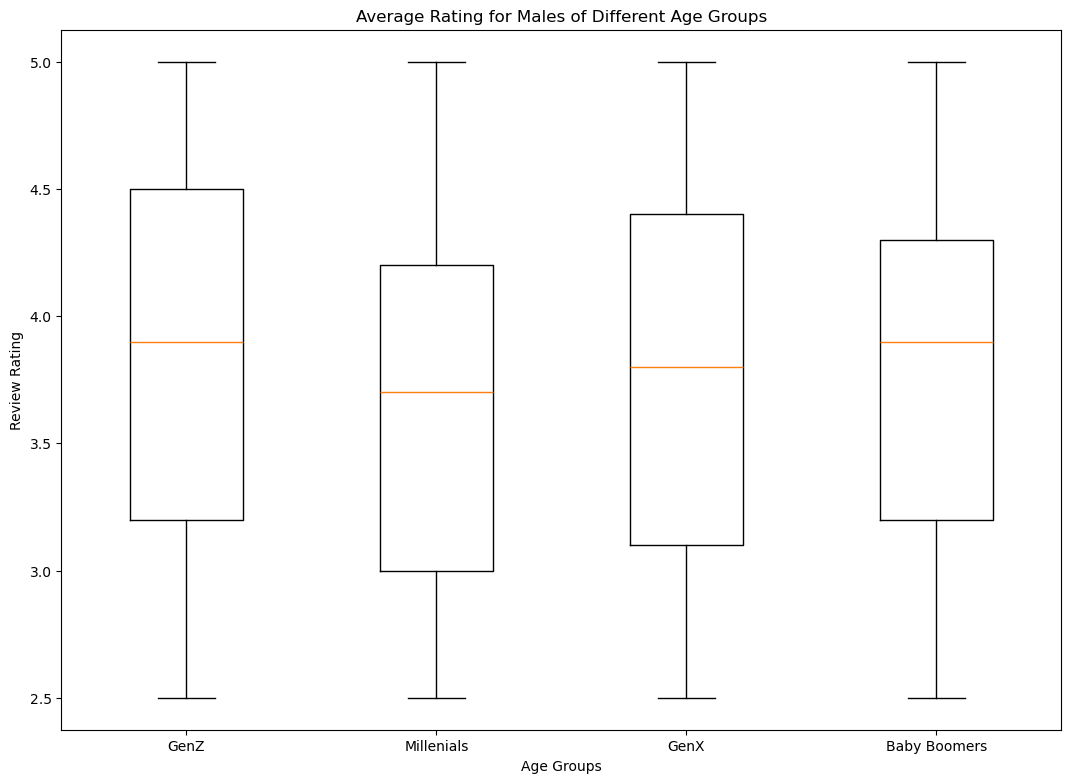

In [22]:
# Box and Whisker plot for Males of different Age Group and Review Rating
# Answers question 1: Is there a relationship between product rating and 
# demographic factors (age group and sex (male/female)?

# Establishing data to be plotted
data_1 = GenZ_male["Review Rating"]
data_2 = Mill_male["Review Rating"]
data_3 = GenX_male["Review Rating"]
data_4 = Baby_male["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Males of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millenials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

In [23]:
GenZ_female["Review Rating"]

3499    3.0
3514    4.7
2973    2.7
3110    4.6
3706    4.0
       ... 
2713    3.8
3094    2.7
3374    3.7
2662    2.8
2845    4.1
Name: Review Rating, Length: 198, dtype: float64

In [24]:
Mill_female["Review Rating"]

2854    2.7
3623    2.7
3267    3.0
3791    3.7
3574    4.9
       ... 
3528    4.5
3349    2.8
2692    4.2
3134    4.4
2967    3.4
Name: Review Rating, Length: 198, dtype: float64

In [25]:
GenX_female["Review Rating"]

2723    2.9
3351    4.2
2985    3.0
3837    4.8
2917    2.9
       ... 
2899    4.2
3871    4.1
3225    3.0
3896    4.5
3768    4.0
Name: Review Rating, Length: 198, dtype: float64

In [26]:
Baby_female["Review Rating"]

2879    4.9
3191    4.7
3297    4.1
3832    4.8
3077    3.0
       ... 
3046    3.2
3306    3.6
3829    2.9
3129    4.7
3663    4.4
Name: Review Rating, Length: 198, dtype: float64

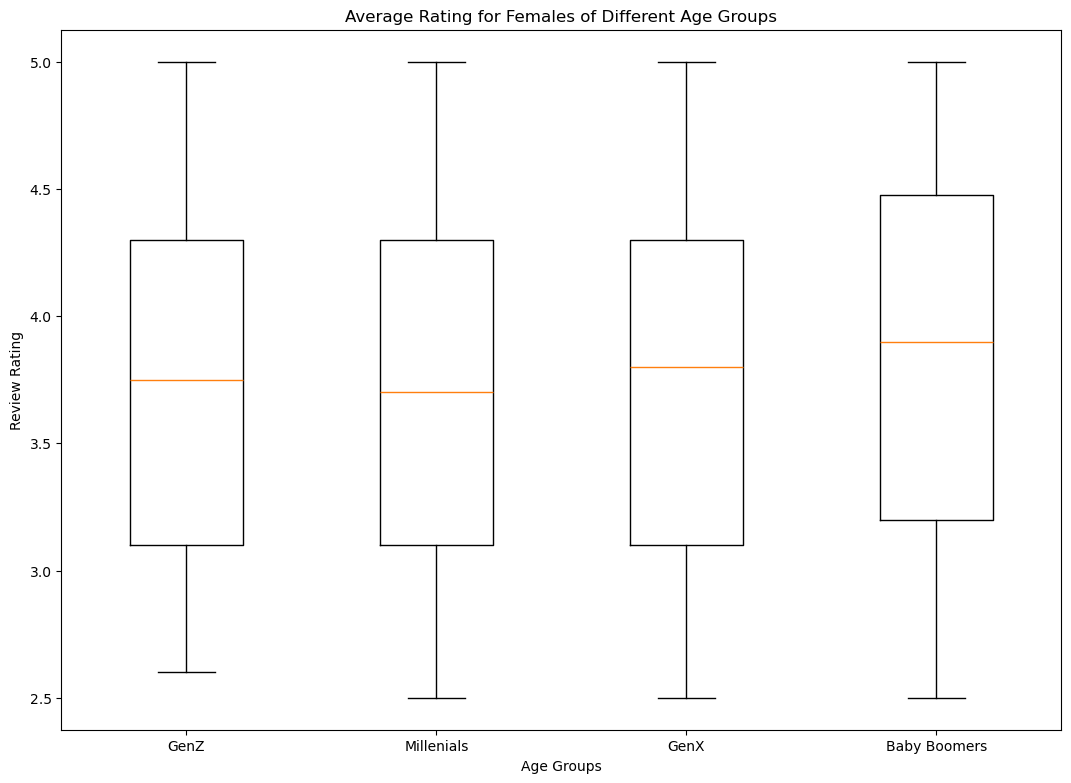

In [27]:
# Box and Whisker plot for Females of different Age Group and Review Rating
# Answers question 1: Is there a relationship between product rating and 
# demographic factors (age group and sex (male/female)?

# Establishing data to be plotted
data_1 = GenZ_female["Review Rating"]
data_2 = Mill_female["Review Rating"]
data_3 = GenX_female["Review Rating"]
data_4 = Baby_female["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Females of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millenials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

In [28]:
## What type of clothing is purchased for each season work below this line ##

In [29]:
organized_df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [30]:
organized_df.groupby(["Category"])["Season"].value_counts()

Category     Season
Accessories  Fall      324
             Summer    312
             Winter    303
             Spring    301
Clothing     Spring    454
             Winter    448
             Fall      427
             Summer    408
Footwear     Spring    163
             Summer    160
             Winter    140
             Fall      136
Outerwear    Fall       88
             Spring     81
             Winter     80
             Summer     75
Name: count, dtype: int64

In [31]:
#Locate categories of attire purchased solely during the "Fall" Season
fall_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Fall")])
                              
fall_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
6,7,63,Baby Boomer,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
10,11,53,Gen X,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,Yes,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly
24,25,18,Gen Z,Male,Jacket,Outerwear,22,Florida,M,Green,Fall,2.9,Yes,Store Pickup,Yes,Yes,16,Debit Card,Weekly
28,29,54,Gen X,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Free Shipping,Yes,Yes,41,PayPal,Every 3 Months
29,30,31,Millenials,Male,Dress,Clothing,48,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,14,Credit Card,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3876,3877,60,Baby Boomer,Female,Shoes,Footwear,85,Wisconsin,S,Cyan,Fall,2.6,No,2-Day Shipping,No,No,7,Cash,Annually
3882,3883,35,Millenials,Female,Pants,Clothing,95,North Dakota,L,Blue,Fall,2.6,No,Free Shipping,No,No,24,Cash,Fortnightly
3883,3884,34,Millenials,Female,Hat,Accessories,38,North Dakota,XL,Purple,Fall,4.0,No,Next Day Air,No,No,22,Cash,Fortnightly
3884,3885,47,Gen X,Female,Sandals,Footwear,29,Maryland,M,Brown,Fall,4.9,No,Express,No,No,3,PayPal,Weekly


In [66]:
# Filter the DataFrame down only to those columns to chart
fall_category = fall_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
fall_category_counts = season_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
fall_category_counts = fall_category_counts.unstack()

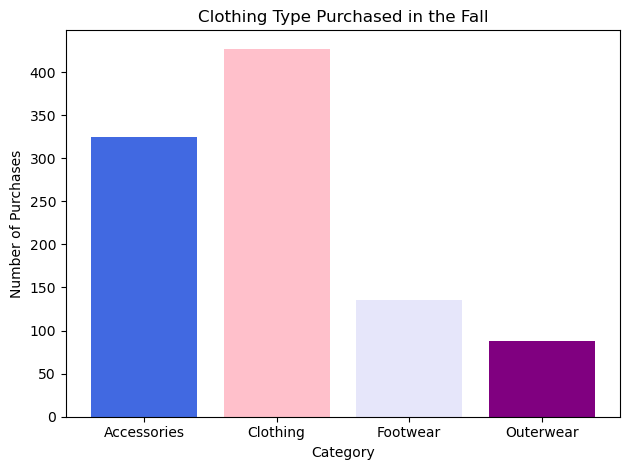

In [92]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(fall_category_counts.T.index, fall_category_counts.T["Fall"], color = color)
plt.title("Clothing Type Purchased in the Fall")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

In [34]:
#Locate categories of attire purchased solely during the "Winter" Season
winter_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Winter")])
                              
winter_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
7,8,27,Millenials,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
11,12,30,Millenials,Male,Shorts,Clothing,68,Hawaii,S,Olive,Winter,4.9,Yes,Store Pickup,Yes,Yes,10,Bank Transfer,Fortnightly
12,13,61,Baby Boomer,Male,Coat,Outerwear,72,Delaware,M,Gold,Winter,4.5,Yes,Express,Yes,Yes,37,Venmo,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,3880,26,Gen Z,Female,Skirt,Clothing,63,Florida,L,Maroon,Winter,4.1,No,Free Shipping,No,No,6,Debit Card,Quarterly
3880,3881,42,Millenials,Female,Shirt,Clothing,20,Massachusetts,M,Red,Winter,3.9,No,Free Shipping,No,No,40,PayPal,Monthly
3885,3886,49,Gen X,Female,Socks,Clothing,64,New Mexico,L,Purple,Winter,3.2,No,Free Shipping,No,No,39,Cash,Quarterly
3890,3891,35,Millenials,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually


In [46]:
# Filter the DataFrame down only to those columns to chart
winter_category = winter_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
winter_category_counts = winter_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
winter_category_counts = winter_category_counts.unstack()

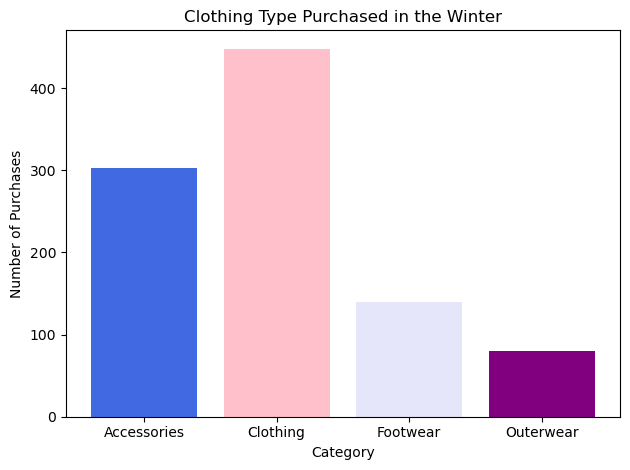

In [94]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(winter_category_counts.T.index, winter_category_counts.T["Winter"], color = color)
plt.title("Clothing Type Purchased in the Winter")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

In [37]:
#Locate categories of attire purchased solely during the "Spring" Season
spring_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Spring")])
                              
spring_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
9,10,57,Gen X,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly
13,14,65,Baby Boomer,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,4.7,Yes,Express,Yes,Yes,31,PayPal,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,3890,57,Gen X,Female,Dress,Clothing,65,Alaska,S,Yellow,Spring,3.5,No,Express,No,No,49,Bank Transfer,Annually
3894,3895,66,Baby Boomer,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [48]:
# Filter the DataFrame down only to those columns to chart
spring_category = spring_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
spring_category_counts = spring_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
spring_category_counts = spring_category_counts.unstack()

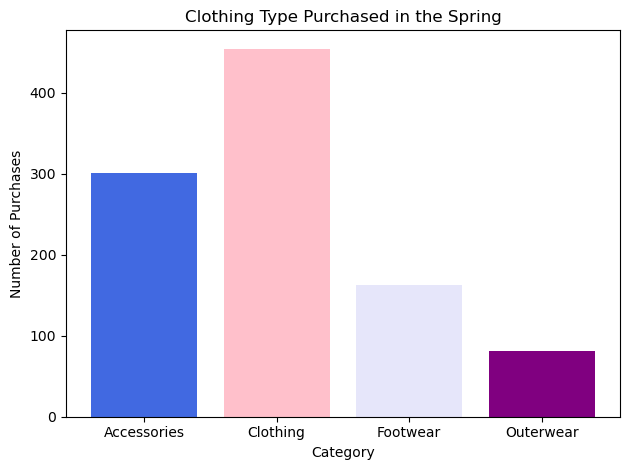

In [96]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(spring_category_counts.T.index, spring_category_counts.T["Spring"], color = color)
plt.title("Clothing Type Purchased in the Spring")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

In [40]:
#Locate categories of attire purchased solely during the "Summer" Season
summer_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Summer")])
                              
summer_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
5,6,46,Gen X,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
8,9,26,Gen Z,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
18,19,52,Gen X,Male,Sweater,Clothing,48,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
19,20,66,Baby Boomer,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly
22,23,56,Gen X,Male,Pants,Clothing,37,California,M,Peach,Summer,3.2,Yes,Store Pickup,Yes,Yes,32,Debit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3879,60,Baby Boomer,Female,Hat,Accessories,42,South Carolina,M,Pink,Summer,3.4,No,2-Day Shipping,No,No,24,Credit Card,Annually
3886,3887,37,Millenials,Female,Jewelry,Accessories,92,Iowa,S,Brown,Summer,3.9,No,Express,No,No,40,Debit Card,Quarterly
3892,3893,35,Millenials,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3895,3896,40,Millenials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly


In [50]:
# Filter the DataFrame down only to those columns to chart
summer_category = summer_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
summer_category_counts = summer_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
summer_category_counts = summer_category_counts.unstack()

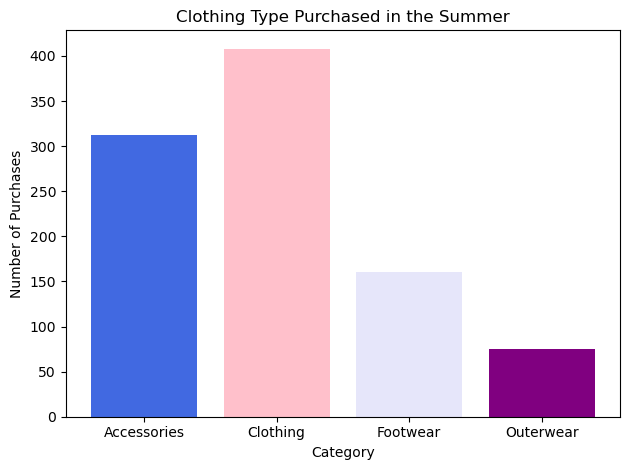

In [98]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(summer_category_counts.T.index, summer_category_counts.T["Summer"], color = color)
plt.title("Clothing Type Purchased in the Summer")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()